In [438]:
import pandas as pd
import numpy as np
import dtale
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline

#statistics
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
from scipy.stats import skew, norm
from sklearn.decomposition import PCA
#double check
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler


#modeling


In [5]:
dataset = pd.read_csv("dataset/train.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [242]:
#using d-tale to preview data
d = dtale.show(dataset)

d

http://DESKTOP-GLN37NO:40000/dtale/main/1
It looks like this data may have already been loaded to D-Tale based on shape and column names. Here is URL of the data that seems to match it:

None

If you still want to load this data please use the following command:

dtale.show(df, ignore_duplicate=True)


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [376]:
data = dataset.copy()


In [22]:
""""
A SMALL VERSION
def count_unique_values(data):
    
    total = data.count()
    temp = pd.DataFrame(total)
    temp.columns = ['Total']            # Count total number of non-null values
    
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()    # Get unique values for each column
        uniques.append(unique)
    temp['Uniques'] = uniques
    nans = []
    for col in data.columns:
        nan = data[col].isnull().sum()    # Get nulls values for each column
        nans.append(nan)
    temp['Null'] = nans    
    
    
    
    
    return(temp)
""""

In [377]:
#Dealing with null
small_summary = count_unique_values(data)
small_summary

,Total,Uniques,Null
Id,1460,1460,0
MSSubClass,1460,15,0
MSZoning,1460,5,0
LotFrontage,1201,110,259
LotArea,1460,1073,0
Street,1460,2,0
Alley,91,2,1369
LotShape,1460,4,0
LandContour,1460,4,0
Utilities,1460,2,0


In [378]:
def count_null (nan):
    nan = pd.DataFrame(data.isna().sum(), columns = ['NaN_sum'])
    nan['unique']= data.nunique()
    nan['total Values'] = data.count()
    nan['column'] = nan.index
    nan['Perc(%)'] = (nan['NaN_sum']/1460)*100
    nan = nan[nan['NaN_sum'] > 0]
    nan = nan.sort_values(by = ['NaN_sum'] , ascending = True)
    nan['Usability'] = np.where(nan['Perc(%)'] > 15, 'Discard', 'Keep')
    return nan
count_null (data)

,NaN_sum,unique,total Values,column,Perc(%),Usability
Electrical,1,5,1459,Electrical,0.068493,Keep
MasVnrType,8,4,1452,MasVnrType,0.547945,Keep
MasVnrArea,8,327,1452,MasVnrArea,0.547945,Keep
BsmtQual,37,4,1423,BsmtQual,2.534247,Keep
BsmtCond,37,4,1423,BsmtCond,2.534247,Keep
BsmtFinType1,37,6,1423,BsmtFinType1,2.534247,Keep
BsmtExposure,38,4,1422,BsmtExposure,2.602740,Keep
BsmtFinType2,38,6,1422,BsmtFinType2,2.602740,Keep
GarageCond,81,5,1379,GarageCond,5.547945,Keep
GarageQual,81,5,1379,GarageQual,5.547945,Keep


In [379]:
nan = count_null (data)

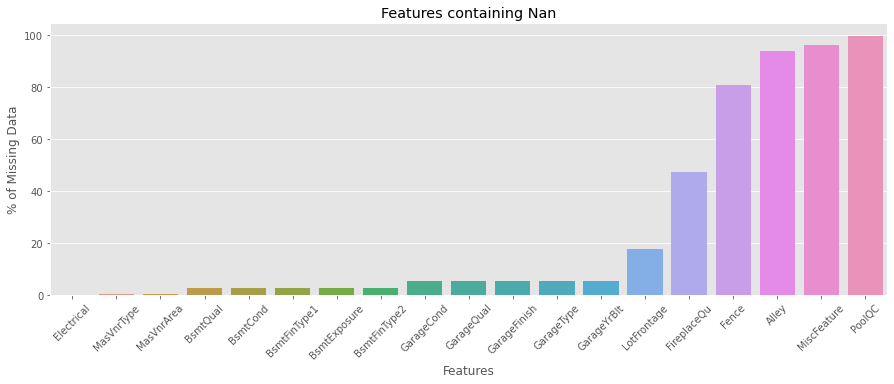

In [380]:
# Plotting Nan

plt.figure(figsize = (15,5))
sns.barplot(x = nan['column'], y = nan['Perc(%)'])
plt.xticks(rotation=45)
plt.title('Features containing Nan')
plt.xlabel('Features')
plt.ylabel('% of Missing Data')
plt.show()

After look at the data description the missing data has meaning so we could sustitute by his value

In [381]:
#small Null
data["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [382]:
data["Electrical"] = data["Electrical"].fillna("SBrkr") 

In [383]:
data["PoolQC"] = data["PoolQC"].fillna("None")
data['MiscFeature'] = data['MiscFeature'].fillna("None")
data["Alley"] = data["Alley"].fillna("None")
data['Fence'] = data['Fence'].fillna("None")
data['FireplaceQu'] = data['FireplaceQu'].fillna("None")
data["MasVnrType"] = data["MasVnrType"].fillna("None") 
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)
for col in ('GarageArea', 'GarageCars'):
    data[col] = data[col].fillna(0)
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    data[col] = data[col].fillna('None')

In [384]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    data[col] = data[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('None')

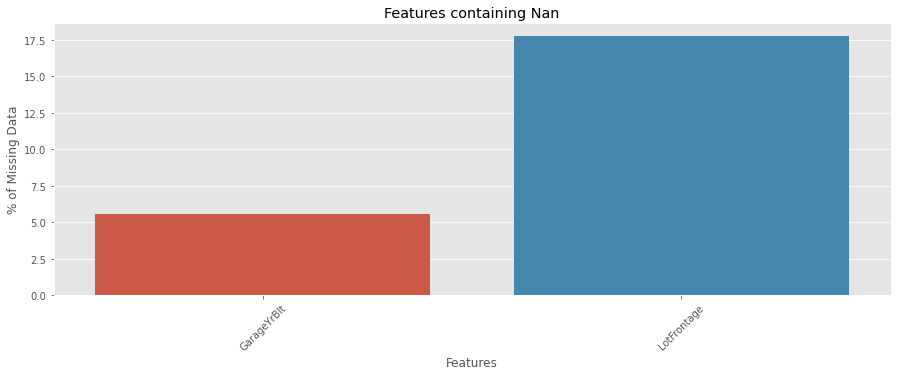

In [385]:
nan = count_null (data)
plt.figure(figsize = (15,5))
sns.barplot(x = nan['column'], y = nan['Perc(%)'])
plt.xticks(rotation=45)
plt.title('Features containing Nan')
plt.xlabel('Features')
plt.ylabel('% of Missing Data')
plt.show()

After a quick look at correlation and predictive power in D-tale  I dont think that garage year and LOtfrontage will affect the analysis so I will drop it

In [386]:
data.drop('GarageYrBlt',axis=1,inplace=True)
data.drop('LotFrontage',axis=1,inplace=True)

In [387]:

nan = pd.DataFrame(data.count())
nan['unique']= data.nunique()
nan = nan[nan.unique <100]
nan.sort_values(by = ['unique'] , ascending = True)


,0,unique
CentralAir,1460,2
Street,1460,2
Utilities,1460,2
Alley,1460,3
BsmtHalfBath,1460,3
LandSlope,1460,3
HalfBath,1460,3
PavedDrive,1460,3
BsmtFullBath,1460,4
Fireplaces,1460,4


In [388]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

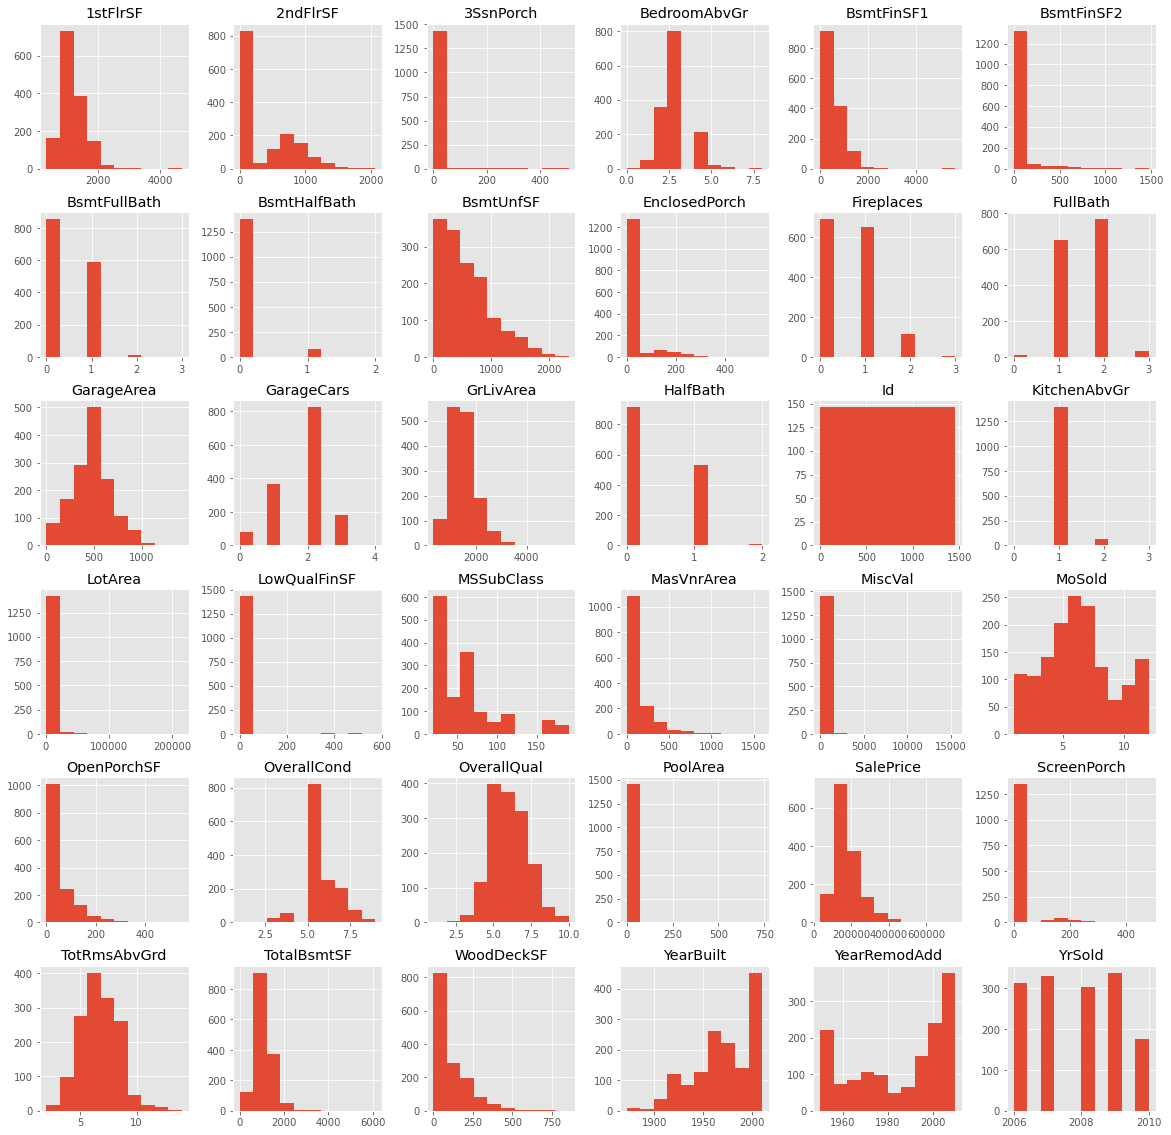

In [389]:
plt.style.use("ggplot")
data.hist(figsize=(20,20))
plt.show()


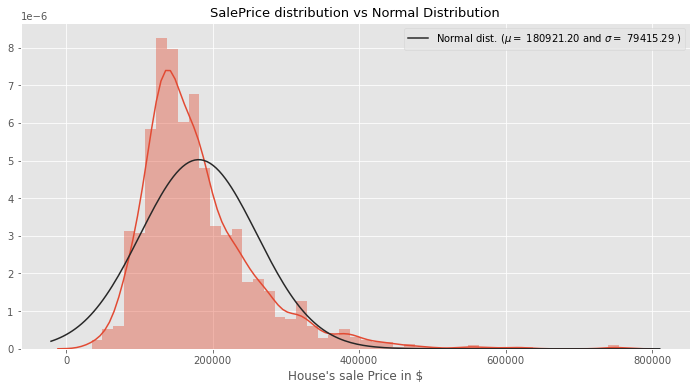

In [390]:
#module norm has a tuple with to value, mean and desvstd (mu, sigma)
(mu, sigma) = norm.fit(dataset['SalePrice'])


plt.figure(figsize = (12,6))
sns.distplot(dataset['SalePrice'], kde = True, hist=True, fit = norm)

plt.title('SalePrice distribution vs Normal Distribution', fontsize = 13)
plt.xlabel("House's sale Price in $", fontsize = 12)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.show()

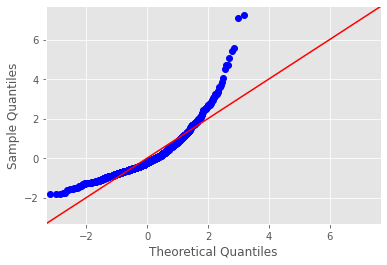

In [391]:

sm.qqplot(dataset['SalePrice'],  stats.t, distargs=(4,),fit=True, line="45")
plt.show()

Dont look  like a normal dist, also confirmed by the quantile-quantile plot

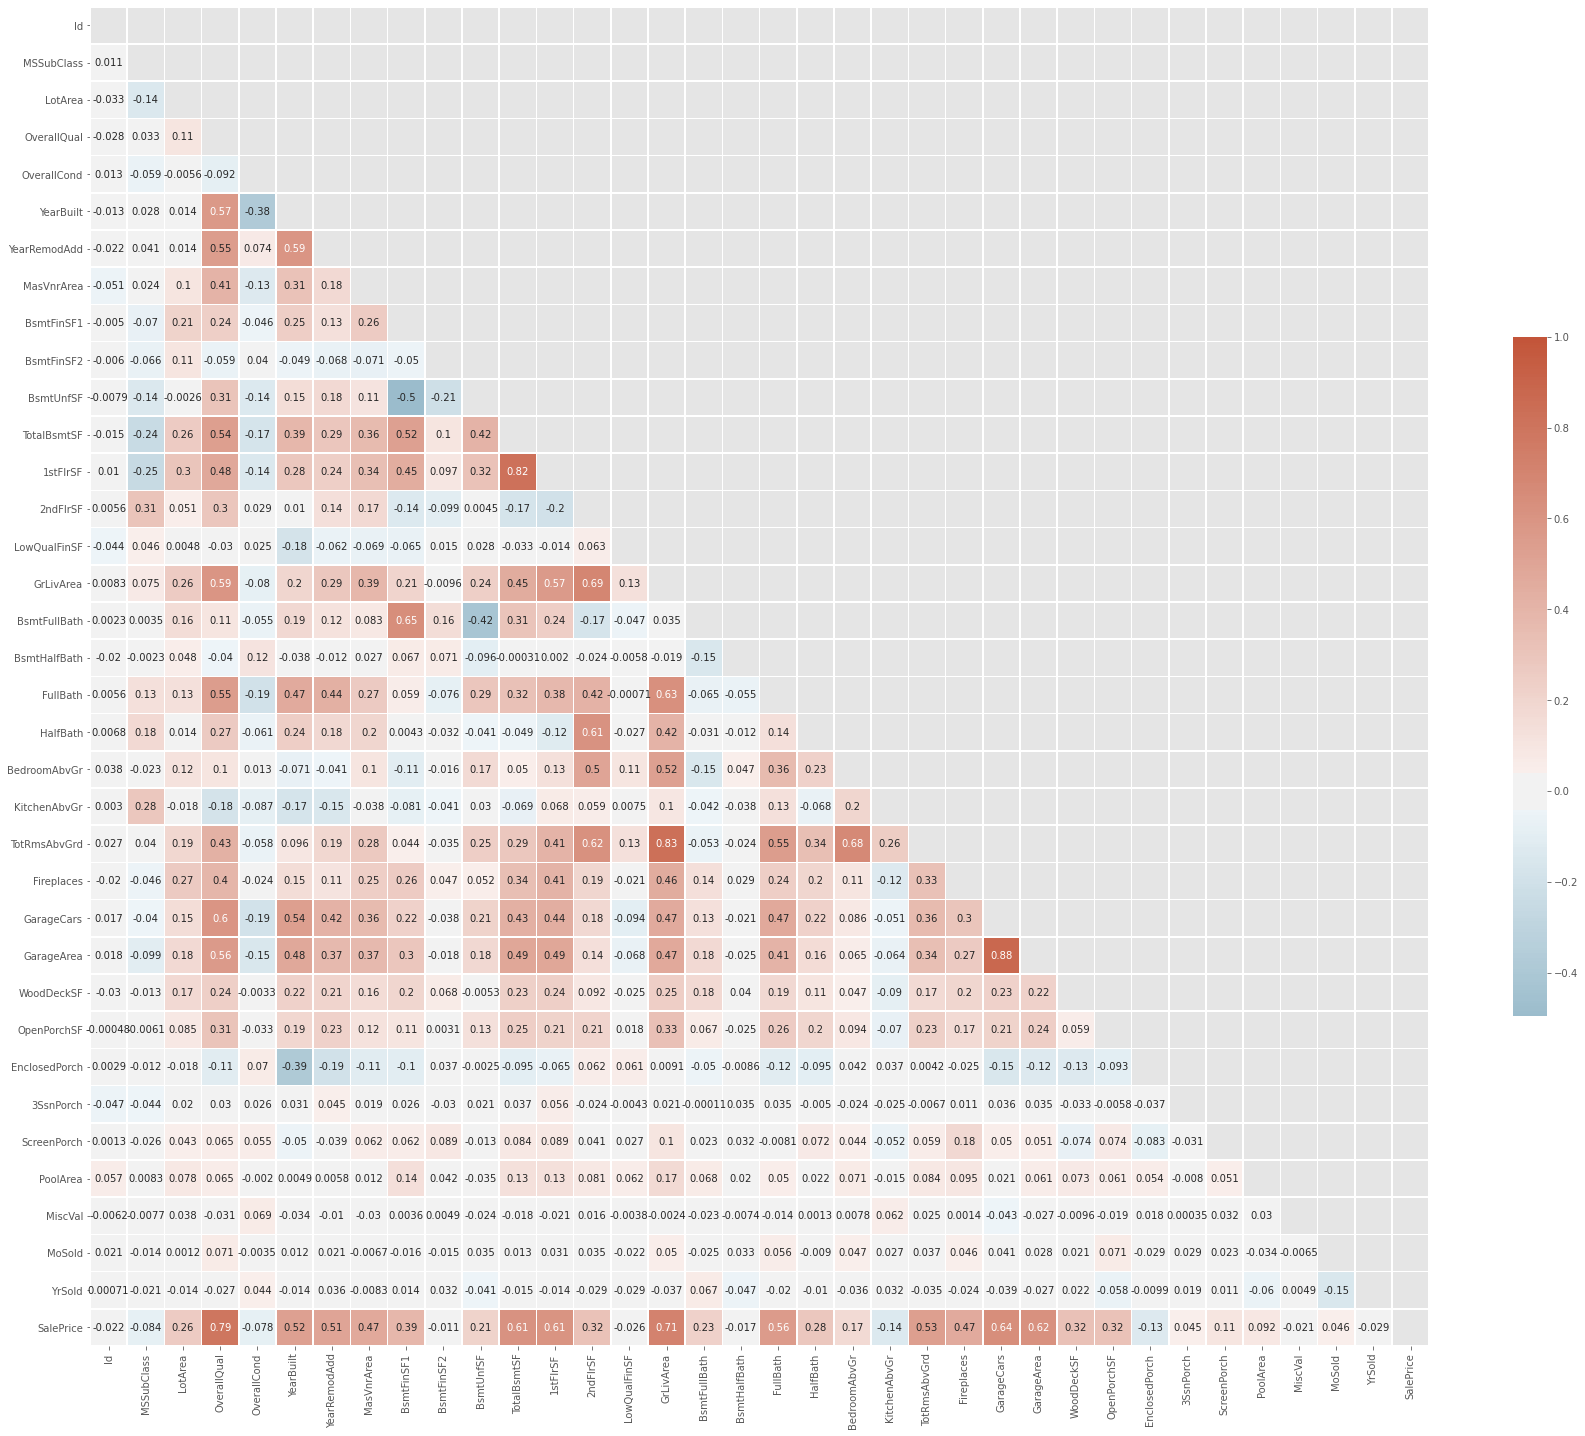

In [392]:
# In a quick view looks like Overallqual, GarageCars,GrlivArea could have a line/.
#relationship with sales prices, but we need to double check
f, ax = plt.subplots(figsize=(30, 25))
mat = data.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.7, cbar_kws={"shrink": .5})
plt.show();

In [393]:
corr = data.corr('pearson')
corr = corr.SalePrice.to_frame().sort_values(by=['SalePrice'] , ascending= False)
corr[corr["SalePrice"]>0.5]

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


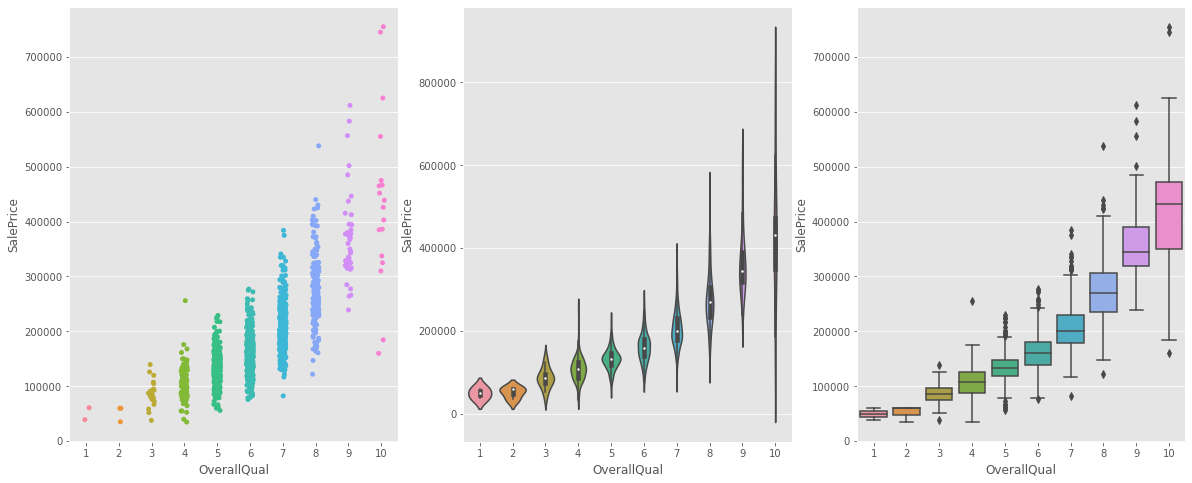

In [394]:
# OverallQuall - SalePrice [Pearson = 0.79]

figure, ax = plt.subplots(1,3, figsize = (20,8))
sns.stripplot(data=data, x = 'OverallQual', y='SalePrice', ax = ax[0])
sns.violinplot(data=data, x = 'OverallQual', y='SalePrice', ax = ax[1])
sns.boxplot(data=data, x = 'OverallQual', y='SalePrice', ax = ax[2])
plt.show()

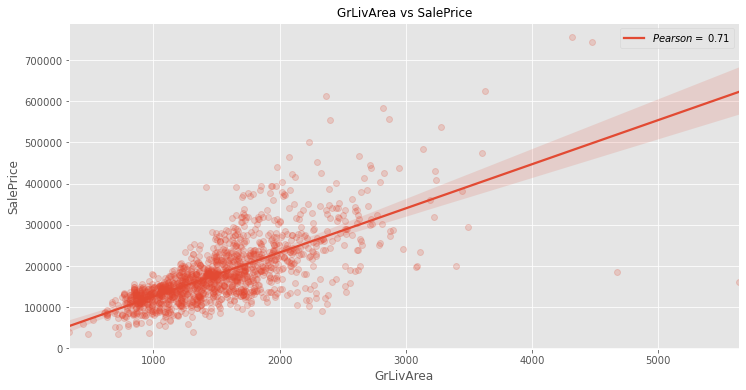

In [395]:
# GrLivArea vs SalePrice [corr = 0.71]

Pearson_GrLiv = 0.71
plt.figure(figsize = (12,6))
sns.regplot(data=data, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GrLivArea vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_GrLiv)], loc = 'best')
plt.show()

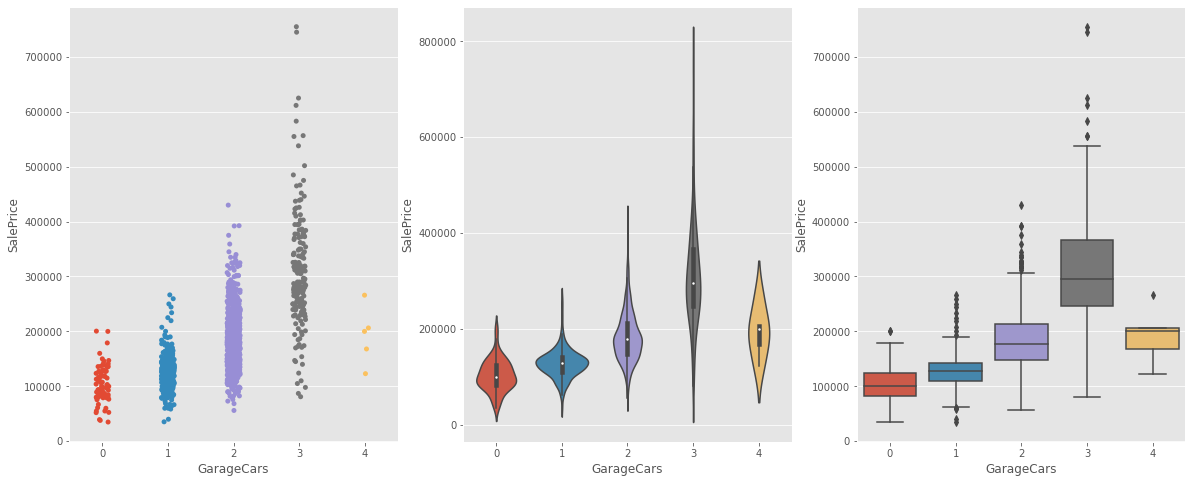

In [396]:
# TotRmsAbvGrd - SalePrice [Pearson = 0.64]

figure, ax = plt.subplots(1,3, figsize = (20,8))
sns.stripplot(data=data, x = 'GarageCars', y='SalePrice', ax = ax[0])
sns.violinplot(data=data, x = 'GarageCars', y='SalePrice', ax = ax[1])
sns.boxplot(data=data, x = 'GarageCars', y='SalePrice', ax = ax[2])
plt.show()

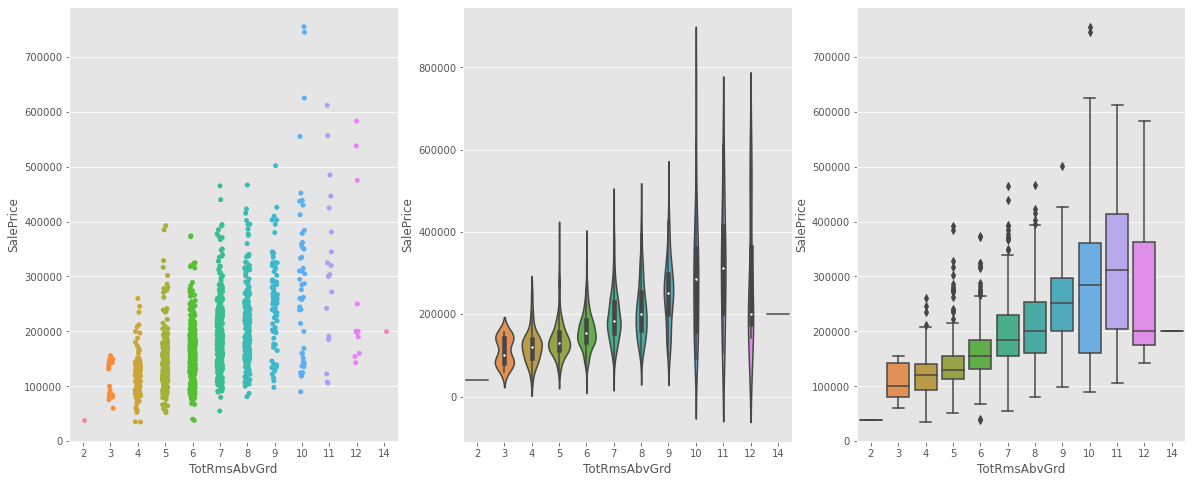

In [397]:
# TotRmsAbvGrd - SalePrice [Pearson = 0.50]

figure, ax = plt.subplots(1,3, figsize = (20,8))
sns.stripplot(data=data, x = 'TotRmsAbvGrd', y='SalePrice', ax = ax[0])
sns.violinplot(data=data, x = 'TotRmsAbvGrd', y='SalePrice', ax = ax[1])
sns.boxplot(data=data, x = 'TotRmsAbvGrd', y='SalePrice', ax = ax[2])
plt.show()

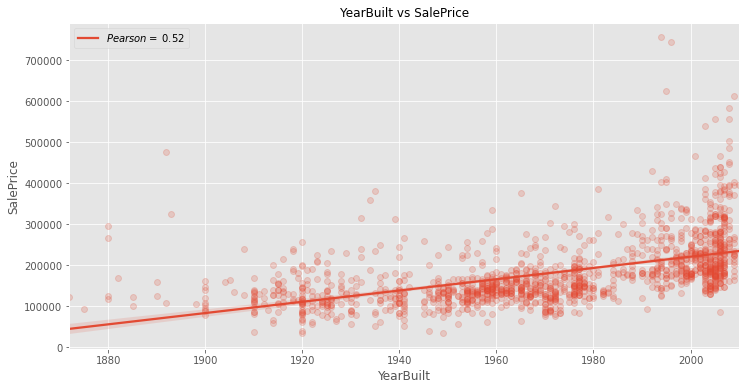

In [398]:
# YearBuilt vs SalePrice

Pearson_YrBlt = 0.52
plt.figure(figsize = (12,6))
sns.regplot(data=data, x = 'YearBuilt', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('YearBuilt vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_YrBlt)], loc = 'best')
plt.show()

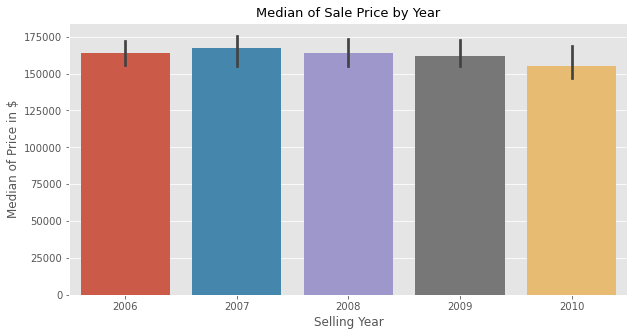

In [399]:
# Median of Sale Price by Year

plt.figure(figsize = (10,5))
sns.barplot(x='YrSold', y="SalePrice", data = data, estimator = np.median)
plt.title('Median of Sale Price by Year', fontsize = 13)
plt.xlabel('Selling Year', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show()

In [421]:
#Remove outliers abover obvious thresholds


data = data.drop(data[data['LotArea'] > 10000].index)
data = data.drop(data[data['MasVnrArea'] > 1200].index)
data = data.drop(data[data['BsmtFinSF1'] > 3000].index)
data = data.drop(data[data['TotalBsmtSF'] > 5000].index)
data = data.drop(data[data['GrLivArea'] > 4000].index)



data.shape

(841, 76)

In [400]:
#Convert categorical data to numerical.
data['MSSubClass'] = data['MSSubClass'].astype('object')
data['MoSold'] = data['MoSold'].astype('object')
data['YrSold'] = data['YrSold'].astype('object')


In [401]:
numeric_col = []
categorical_col = []
for c in data.columns:
    t = str(data[c].dtype)
    if "int" in t or "float" in t:
        numeric_col.append(c)
    else:
        categorical_col.append(c)
numeric_col

['Id',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [414]:
categorical_col

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [403]:
#standardizes the data by removing the mean and scaling the data so that its variance is equal to 1
std = StandardScaler()
data_features = data.copy()
data_num = data_features[numeric_col]
train_stand = std.fit_transform(data_num)

In [404]:
train_stand.var()

1.0000000000000002

In [415]:
#Apply the PCA function 
data_pca = pd.DataFrame(data_stand, index= data_num.index, columns= data_num.columns)
pca = PCA(0.8)
pca.fit(data_pca)

PCA(n_components=0.8)

In [406]:
pca.n_components_

16

In [356]:
np.shape(pca.explained_variance_ratio_.cumsum())

(16,)

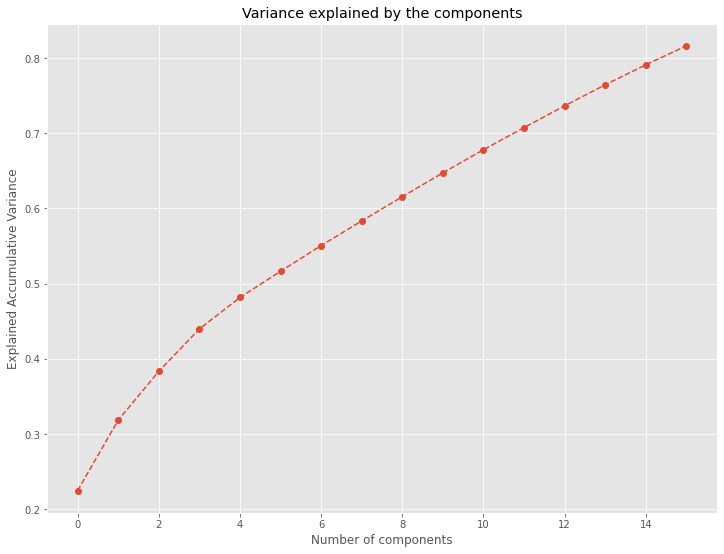

In [357]:
#Graph the PCA results to see how many columns we need to explain 80% of the data set 

plt.figure(figsize=(12,9))
plt.plot(range(16,), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle="--")
plt.title("Variance explained by the components")
plt.xlabel("Number of components")
plt.ylabel("Explained Accumulative Variance"); 
plt.show()
#16 is above 80%

In [334]:

#PCA training 

#pca = PCA(n_components = 16)
#pca.fit(data_num)

PCA(n_components=16)

In [358]:
pca.components_

array([[-3.01091886e-03,  1.07819792e-01,  2.99519943e-01,
        -6.95146600e-02,  2.18990803e-01,  1.98112780e-01,
         1.94368646e-01,  1.41284858e-01, -9.74936808e-03,
         1.09813428e-01,  2.53906010e-01,  2.53597032e-01,
         1.40063304e-01, -1.02637944e-02,  3.01971426e-01,
         7.54753278e-02, -1.00628878e-02,  2.54210139e-01,
         1.26659554e-01,  1.12537778e-01, -1.82033172e-02,
         2.41953036e-01,  1.89512106e-01,  2.74610778e-01,
         2.68979819e-01,  1.32720541e-01,  1.45509969e-01,
        -6.60106700e-02,  1.52707157e-02,  3.68650735e-02,
         4.85466779e-02, -9.95479967e-03,  3.28879107e-01],
       [ 1.78125477e-02, -4.92468801e-02, -2.53983702e-02,
         5.24455902e-02, -1.84001810e-01, -7.52548177e-02,
        -3.43337312e-02, -3.34245266e-01, -8.28442745e-02,
         1.51726801e-01, -2.25139611e-01, -1.70802373e-01,
         4.21456977e-01,  1.20298300e-01,  2.35588482e-01,
        -3.28594128e-01, -3.78342514e-03,  1.53231681e-

In [407]:
pca.transform(data_num)

array([[ 71704.0905256 ,  -9829.84925858,   4625.19835084, ...,
         -1670.01839638,   5484.39303124,  -4927.21629869],
       [ 62909.26953621,  -9415.33207441,   4611.65782109, ...,
         -2353.82849544,   4899.33280198,  -3676.25943512],
       [ 77002.21672415, -10510.35727644,   5454.09222036, ...,
         -2602.03935423,   6081.21720517,  -4623.66574957],
       ...,
       [ 91093.04178611, -11829.51222482,   5626.01524097, ...,
         -1806.14619364,   7567.43029729,  -5942.90453183],
       [ 49586.04363511,  -7442.66303963,   4128.87531652, ...,
         -2688.85884359,   4348.46797281,  -2123.42705694],
       [ 51727.75777737,  -7937.61579275,   4380.02178778, ...,
         -3096.475185  ,   4518.34410251,  -2153.67205885]])

In [360]:
#List comprehension to have the name of the 16 components 
indexes = ['Component'+ ' ' + str(i) for i in range (1,19)]
pca = PCA(n_components = 18)
pca.fit(data_pca)
#Create a Data Frame that contains the original correlation between the variable and
#the component that was generated 
df_pca_comp = pd.DataFrame(data = pca.components_, columns = data_pca.columns.values, index = indexes)
df_pca_comp

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Component 1,-0.003011,0.107820,0.299520,-0.069515,0.218991,0.198113,0.194369,0.141285,-0.009749,0.109813,0.253906,0.253597,0.140063,-0.010264,0.301971,0.075475,-0.010063,0.254210,0.126660,0.112538,-0.018203,0.241953,0.189512,0.274611,0.268980,0.132721,0.145510,-0.066011,0.015271,0.036865,0.048547,-0.009955,0.328879
Component 2,0.017813,-0.049247,-0.025398,0.052446,-0.184002,-0.075255,-0.034334,-0.334245,-0.082844,0.151727,-0.225140,-0.170802,0.421457,0.120298,0.235589,-0.328594,-0.003783,0.153232,0.218081,0.368025,0.161630,0.321627,-0.015305,-0.071265,-0.104885,-0.080537,0.036311,0.112072,-0.028362,0.003626,0.000003,0.026089,-0.043391
Component 3,0.013226,0.274395,-0.138691,0.160496,-0.333895,-0.266065,-0.009767,0.320550,0.219203,-0.341617,0.069784,0.143536,0.069966,0.132848,0.176011,0.284318,0.089958,-0.125707,-0.012662,0.174473,0.099333,0.158471,0.209213,-0.153418,-0.093933,0.074415,-0.011201,0.184478,-0.036006,0.144637,0.194487,0.065577,0.013633
Component 4,0.002786,0.095332,-0.052843,-0.105775,-0.169251,-0.166611,-0.032191,-0.152441,0.008167,0.460928,0.308768,0.374839,-0.317755,0.104822,0.021497,-0.179654,-0.029862,0.058355,-0.433343,0.081621,0.232305,0.077984,-0.018948,-0.030607,0.001661,-0.107386,-0.063956,0.155933,0.023146,-0.017677,0.018697,0.003555,-0.044144
Component 5,-0.088154,0.077977,0.142808,0.456333,-0.132334,0.131372,-0.035761,-0.184600,0.146801,0.193488,0.056945,0.008107,-0.033999,0.096946,-0.013309,-0.263546,0.301134,-0.138862,-0.000601,-0.119929,-0.489225,-0.118351,0.215585,-0.043800,-0.035474,0.027512,0.124462,0.059823,0.085088,0.282052,0.039775,0.024701,0.093494
Component 6,0.216687,-0.137268,0.033948,-0.296648,-0.006642,-0.200711,0.014348,-0.053710,0.058621,0.082287,0.048596,-0.014704,0.011961,0.057750,0.004463,0.050554,-0.395730,-0.123362,0.153081,-0.098259,-0.159910,-0.062139,0.147401,0.011350,0.020226,-0.329873,0.224796,0.043820,-0.316473,0.484386,0.117726,-0.126984,-0.012164
Component 7,0.158942,-0.139669,0.124616,0.227746,-0.066239,0.262581,-0.254694,0.030622,-0.117173,0.029447,0.018408,-0.017374,0.040007,0.305457,0.048718,0.176961,-0.389795,0.049566,-0.113082,-0.091588,-0.150448,-0.010747,-0.136311,-0.064428,-0.024261,0.069117,0.151488,0.361314,-0.058201,-0.368203,0.288242,0.002989,0.053761
Component 8,-0.444549,-0.086904,0.061059,-0.010667,-0.130617,-0.111409,0.254738,0.188899,-0.496423,-0.007237,0.006555,-0.011967,0.046361,0.142997,0.042941,0.047086,-0.137487,-0.100393,0.041635,-0.102546,-0.050320,-0.018518,0.105838,-0.028431,-0.008077,-0.284863,-0.021772,0.206417,0.414707,0.035197,-0.163079,-0.067749,0.052780
Component 9,0.441676,-0.144630,0.006133,0.309665,-0.045855,0.098270,0.002237,0.138080,-0.311122,-0.031525,-0.002602,0.036505,-0.026134,-0.275104,-0.020310,-0.016621,0.053463,0.016935,-0.069463,0.002937,0.191918,0.023832,-0.051569,0.057132,0.074928,-0.283158,0.021296,-0.060969,0.140451,0.234619,0.107227,0.503421,0.009505
Component 10,-0.359161,0.001532,-0.022553,0.009078,0.108207,0.172651,-0.198959,-0.023120,0.169800,-0.010598,0.027728,0.011786,-0.050227,0.356143,-0.000100,0.108202,-0.201874,0.116192,-0.031813,0.027958,0.155255,0.042797,-0.115412,-0.167100,-0.168094,-0.045194,0.261883,-0.448415,0.146312,0.233911,-0.027866,0.342417,-0.022879


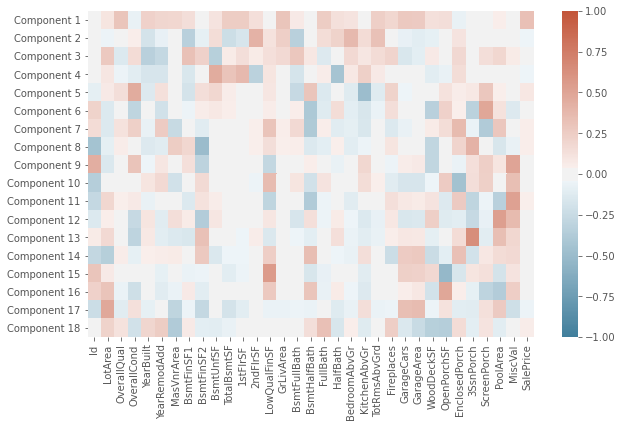

In [361]:
fig, ax = plt.subplots(figsize=(10,6))        
sns.heatmap(df_pca_comp, mask = df_pca_comp > 0.80, vmin = -1, vmax = 1, cmap = cmap, annot = False)
plt.show()

In [365]:
df_transform = pca.transform(data_pca)
data_pca = pd.DataFrame(df_transform, index = data.index, columns = indexes)
data_pca
#no pude continuar con el final dataframe

ValueError: operands could not be broadcast together with shapes (1460,18) (33,) 

#model

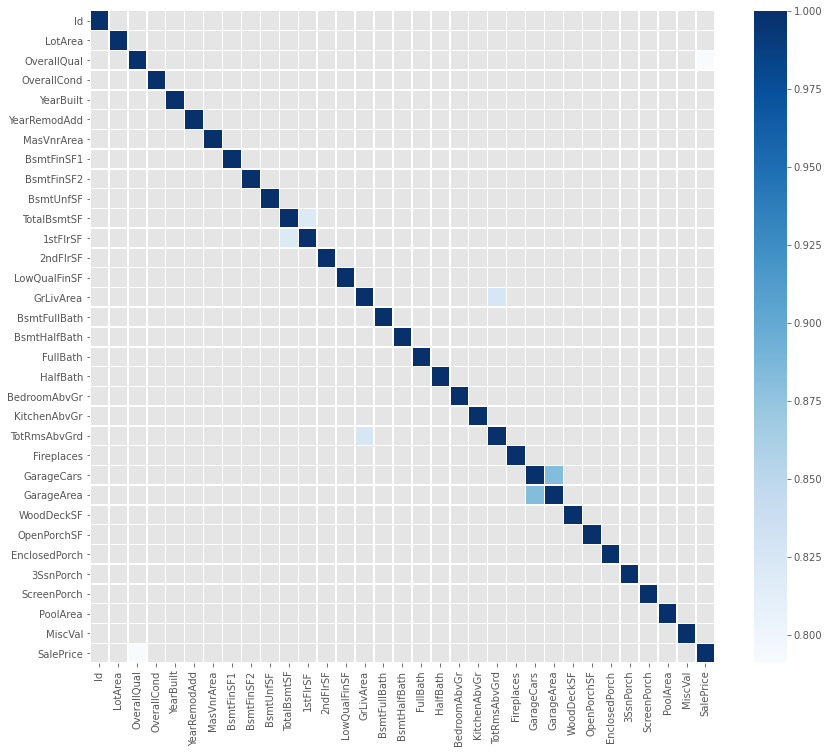

In [408]:
plt.figure(figsize=(14,12))
correlation = data[numeric_col].corr()
sns.heatmap(correlation, mask = correlation < 0.75, linewidth=0.5, cmap='Blues')

In [409]:
#Can drop similar features
data.drop(['TotRmsAbvGrd','1stFlrSF','GarageCars'], axis=1, inplace=True)

In [410]:
#check for features where more than 95% of values the same and drop them as they will not assist the model much
overfit_num = []
for i in data.columns:
    counts = data[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(data) * 100 > 95:
        overfit_num.append(i)

overfit_num = list(overfit_num)



In [411]:
overfit_num

['Street',
 'Utilities',
 'Condition2',
 'RoofMatl',
 'Heating',
 'LowQualFinSF',
 'KitchenAbvGr',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'MiscFeature',
 'MiscVal']

In [372]:
#data.drop(overfit_num, axis=1, inplace=True)
#data.drop(overfit_num, axis=1, inplace=True)

KeyError: "['Street' 'Utilities' 'Condition2' 'RoofMatl' 'Heating' 'LowQualFinSF'\n 'KitchenAbvGr' '3SsnPorch' 'PoolArea' 'PoolQC' 'MiscFeature' 'MiscVal'] not found in axis"

In [422]:
data_dummy = pd.get_dummies(data)


In [423]:

numeric_features = data_dummy.dtypes[data_dummy.dtypes != object].index
skewed_features = data_dummy[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

# Normalize skewed features using log_transformation
    
for i in skew_index:
    data_dummy[i] = np.log1p(data_dummy[i])

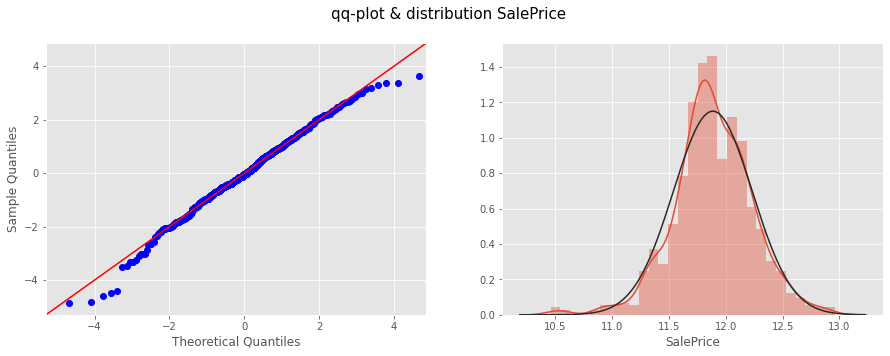

In [424]:

target_log = np.log1p(data["SalePrice"])

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(target_log, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(target_log, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

# regresion

In [426]:
x = sm.add_constant(data['OverallQual'])
y = data['SalePrice']
linreg_stats = sm.OLS(y,x).fit()
print(linreg_stats.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     1266.
Date:                Thu, 28 Jan 2021   Prob (F-statistic):          9.11e-170
Time:                        03:56:06   Log-Likelihood:                -9973.9
No. Observations:                 841   AIC:                         1.995e+04
Df Residuals:                     839   BIC:                         1.996e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.421e+04   5697.248     -7.760      

In [431]:
x = sm.add_constant(data['GrLivArea'])
y = data['SalePrice']
linreg_stats = sm.OLS(y,x).fit()
print(linreg_stats.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     600.6
Date:                Thu, 28 Jan 2021   Prob (F-statistic):          1.86e-100
Time:                        03:59:12   Log-Likelihood:                -10134.
No. Observations:                 841   AIC:                         2.027e+04
Df Residuals:                     839   BIC:                         2.028e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.766e+04   4961.658      7.590      0.0

In [433]:
x = sm.add_constant(data['GarageArea'])
y = data['SalePrice']
linreg_stats = sm.OLS(y,x).fit()
print(linreg_stats.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     460.1
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           1.01e-81
Time:                        04:00:04   Log-Likelihood:                -10177.
No. Observations:                 841   AIC:                         2.036e+04
Df Residuals:                     839   BIC:                         2.037e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.574e+04   3523.871     24.332      0.0

In [434]:
x = sm.add_constant(data['FullBath'])
y = data['SalePrice']
linreg_stats = sm.OLS(y,x).fit()
print(linreg_stats.summary())



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     433.2
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           6.72e-78
Time:                        04:00:46   Log-Likelihood:                -10186.
No. Observations:                 841   AIC:                         2.038e+04
Df Residuals:                     839   BIC:                         2.038e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.541e+04   4524.053     14.458      0.0

In [435]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train, target_log, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)